In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat

In [2]:
mat = loadmat('ex8data1.mat')
X = mat['X']
Xval = mat['Xval']
yval = mat['yval']
print('X: ',X.shape,', Xval: ',Xval.shape,', yval: ',yval.shape)

X:  (307, 2) , Xval:  (307, 2) , yval:  (307, 1)


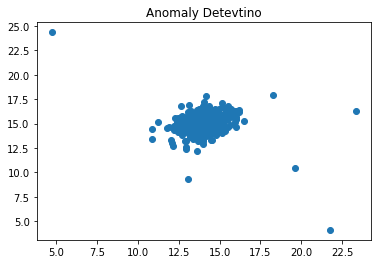

In [3]:
# Visualizing Data
plt.scatter(X[:,0], X[:,1])
plt.title('Anomaly Detevtino')
plt.show()

In [7]:
def calMuSigma(X):
    
    m = len(X)
    mu = 1/m * np.sum(X, axis=0)
    variance = 1/m * np.sum((X-mu)**2, axis=0)
    
    return mu, variance

In [47]:
mu, sigma2 = calMuSigma(X)

In [48]:
# Multivariate Gaussian Distribution
def multivariateGaussian(X, mu, sigma2):
    
    
    k = len(mu)
    
    sigma2=np.diag(sigma2)
    X = X - mu.T
    p = 1/((2*np.pi)**(k/2)*(np.linalg.det(sigma2)**0.5))* np.exp(-0.5* np.sum(X @ np.linalg.pinv(sigma2) * X,axis=1))
    
    return p

In [49]:
p = multivariateGaussian(X, mu, sigma2)

C:\Users\rajesh.malviya\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys


Text(0, 0.5, 'Throughput (mb/s)')

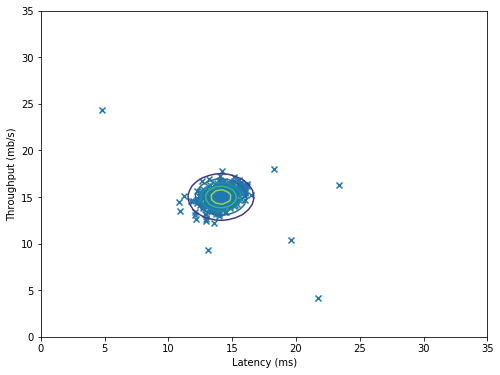

In [73]:
# Visualizing the fit
plt.figure(figsize=(8,6))
plt.scatter(X[:,0],X[:,1],marker="x")
X1,X2 = np.meshgrid(np.linspace(0,35,num=70),np.linspace(0,35,num=70))
p2 = multivariateGaussian(np.hstack((X1.flatten()[:,np.newaxis],X2.flatten()[:,np.newaxis])), mu, sigma2)
#contour_level = 10**np.array([np.arange(-15,0,3,dtype=np.float)]).T
contour_level = np.log(X1)
plt.contour(X1,X2,p2[:,np.newaxis].reshape(X1.shape))
plt.xlim(0,35)
plt.ylim(0,35)
plt.xlabel("Latency (ms)")
plt.ylabel("Throughput (mb/s)")

In [74]:
# Selecting threshold value of epsilon
def threshold(yval, pval):
    
    best_epi = 0
    best_f1 = 0
    step_size = (pval.max()-pval.min())/1000
    epi_range = np.arange(pval.min(),pval.max(), step_size)
    
    for epi in epi_range:
        predictions = (pval<epi)[:,np.newaxis]
        tp = np.sum(predictions[yval==1]==1)
        fp = np.sum(predictions[yval==0]==1)
        fn = np.sum(predictions[yval==1]==0)
        
        pre = tp/(tp+fp)
        rec = tp/(tp+fn)
        f1 = (2*pre*rec)/(pre+rec)
        
        if f1>best_f1:
            best_f1 = f1
            best_epi = epi
        
    return best_epi, best_f1

In [75]:
pval = multivariateGaussian(Xval, mu, sigma2)
epsilon, f1 = threshold(yval, pval)
print('Best Epsilon: ',epsilon,', Best F1: ',f1)

Best Epsilon:  8.990852779269495e-05 , Best F1:  0.8750000000000001


C:\Users\rajesh.malviya\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in long_scalars
  from ipykernel import kernelapp as app


Text(0, 0.5, 'Throughput')

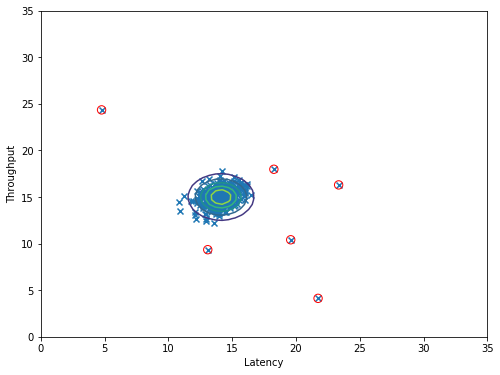

In [77]:
plt.figure(figsize=(8,6))

# plot the data
plt.scatter(X[:,0],X[:,1],marker="x")

# potting of contour
X1,X2 = np.meshgrid(np.linspace(0,35,num=70),np.linspace(0,35,num=70))
p2 = multivariateGaussian(np.hstack((X1.flatten()[:,np.newaxis],X2.flatten()[:,np.newaxis])), mu, sigma2)
contour_level = 10**np.array([np.arange(-20,0,3,dtype=np.float)]).T
plt.contour(X1,X2,p2[:,np.newaxis].reshape(X1.shape))

# Circling of anomalies
outliers = np.nonzero(p<epsilon)[0]
plt.scatter(X[outliers,0],X[outliers,1],marker ="o",facecolor="none",edgecolor="r",s=70)

plt.xlim(0,35)
plt.ylim(0,35)
plt.xlabel("Latency")
plt.ylabel("Throughput")